# Credit Card Fraud Detection with Decision Tree & SVM

## Objectives
- Load and preprocess the dataset  
- Perform exploratory data analysis (EDA)  
- Train classification models (Decision Tree & SVM)  
- Evaluate and compare model performance  
- Discuss results and potential improvements

In [1]:
# Import required libraries
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Loading
We load the credit card fraud dataset, which contains anonymized features and a binary fraud label.

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA)
We explore class imbalance, transaction distributions, and feature correlations.

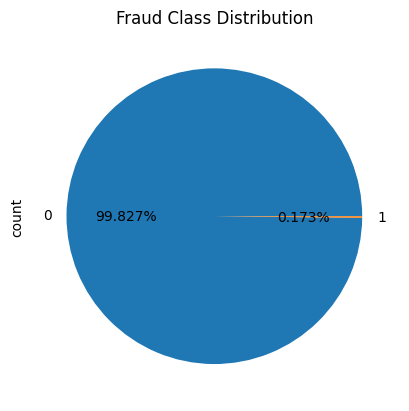

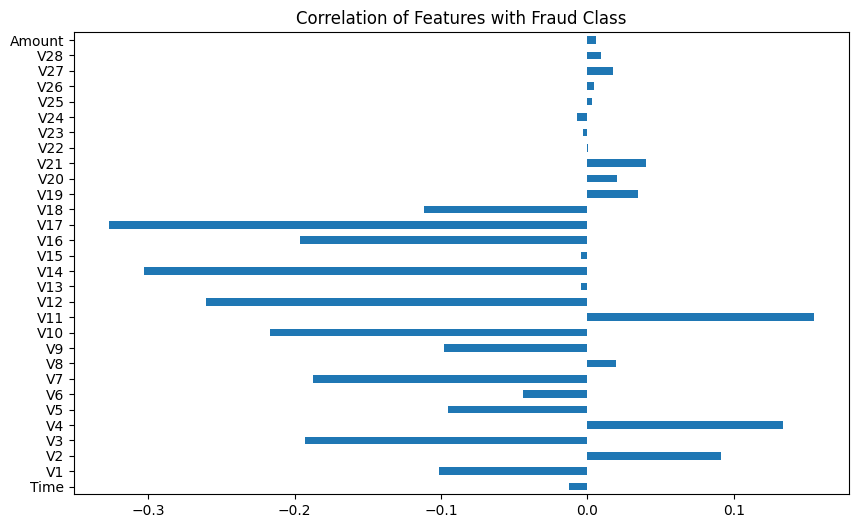

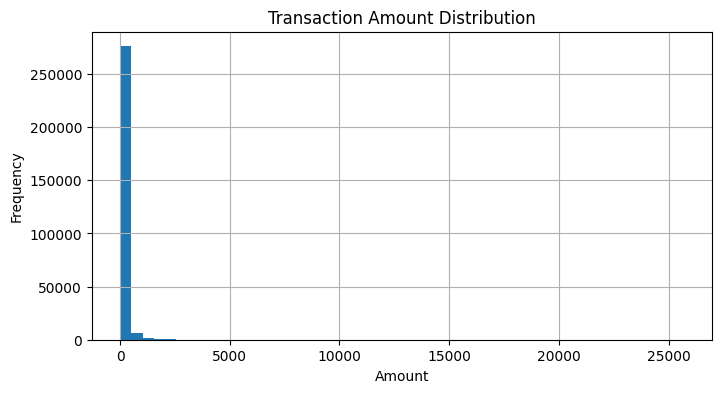

<Figure size 600x400 with 0 Axes>

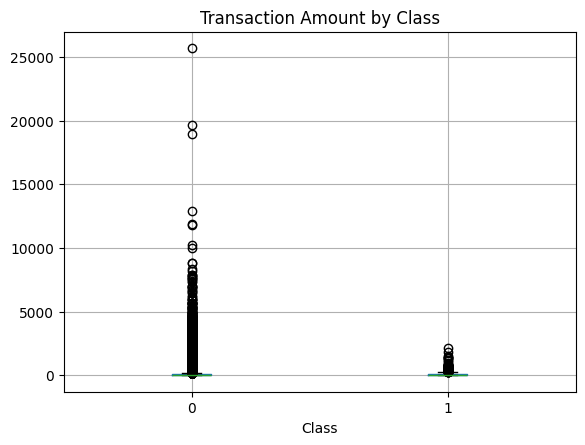

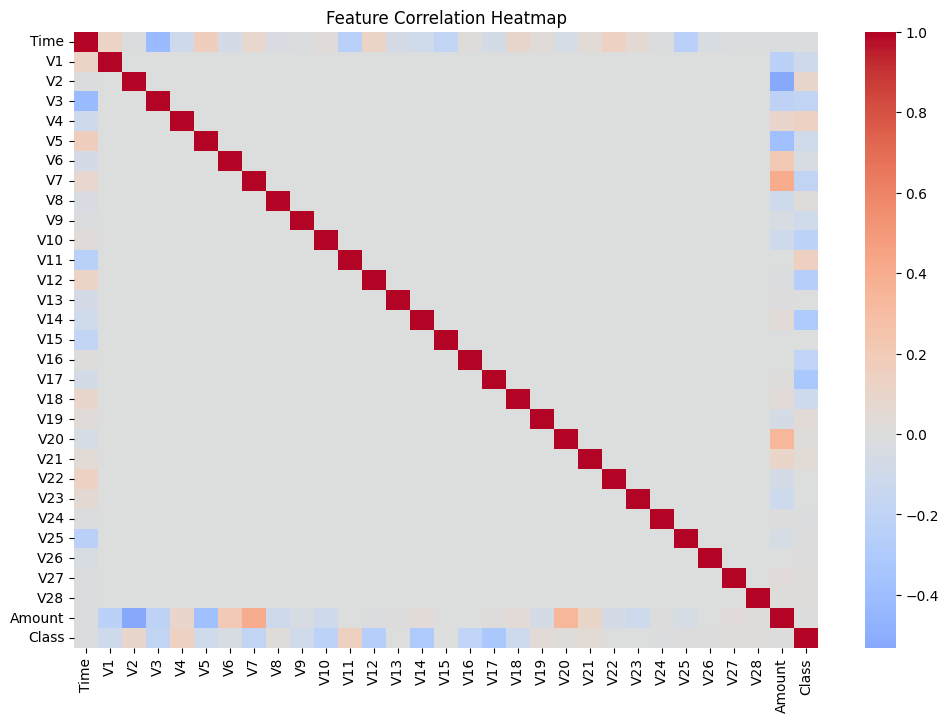

In [3]:
# Class imbalance
df['Class'].value_counts().plot.pie(autopct='%1.3f%%', title="Fraud Class Distribution"); plt.show()

# Correlation with target
corr_values = df.corr()['Class'].drop('Class')
corr_values.plot(kind='barh', figsize=(10, 6), title="Correlation of Features with Fraud Class")
plt.show()

# Amount distribution
plt.figure(figsize=(8,4))
df['Amount'].hist(bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot by class
plt.figure(figsize=(6,4))
df.boxplot(column="Amount", by="Class")
plt.title("Transaction Amount by Class")
plt.suptitle("")
plt.show()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Preprocessing
- Standardize features  
- Normalize feature matrix  
- Train/test split  
- Apply class balancing (sample weights)

In [4]:
# Standardize features
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# Feature matrix (exclude 'Time')
X, y = data_matrix[:, 1:30], data_matrix[:, 30]

# Normalize
X = normalize(X, norm="l1")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sample weights for Decision Tree
w_train = compute_sample_weight('balanced', y_train)

## Model Training
We train two classifiers:  
- Decision Tree (max depth = 4)  
- Linear SVM with class balancing

In [5]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)

# SVM
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

## Model Evaluation & Comparison
We evaluate models using:  
- ROC-AUC score  
- Accuracy  
- Confusion Matrix  
- Classification Report

In [6]:
# ---- Decision Tree ----
y_pred_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

y_pred_dt_class = dt.predict(X_test)
print("\n=== Decision Tree Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_class))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_class))

# ---- SVM ----
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("\nSVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

y_pred_svm_class = svm.predict(X_test)
print("\n=== SVM Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_class))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_class))

Decision Tree ROC-AUC score : 0.939

=== Decision Tree Evaluation ===
Accuracy: 0.9655091698559274
Confusion Matrix:
 [[82377  2930]
 [   17   119]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     85307
         1.0       0.04      0.88      0.07       136

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443


SVM ROC-AUC score: 0.986

=== SVM Evaluation ===
Accuracy: 0.8298397762250858
Confusion Matrix:
 [[70771 14536]
 [    3   133]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     85307
         1.0       0.01      0.98      0.02       136

    accuracy                           0.83     85443
   macro avg       0.50      0.90      0.46     85443
weighted avg       1.00      0.83      0.91     85443



## Conclusion
- Dataset is highly imbalanced → ROC-AUC is more reliable than accuracy.  
- **SVM (ROC-AUC ≈ 0.986)** outperforms Decision Tree (≈ 0.939).  
- Decision Tree offers interpretability, SVM better generalization.  

### Future Work
- Use ensemble models (Random Forest, XGBoost, LightGBM)  
- Apply resampling (SMOTE, undersampling, oversampling)  
- Tune hyperparameters (GridSearch/RandomSearch)